<a href="https://colab.research.google.com/github/tnguruve/mastersinAi/blob/main/Copy_of_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

#Warnings (optional: suppress pandas copy warnings)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)


In [ ]:
# Load dataset (update the path if needed)
df = pd.read_csv("/content/Life_Expectancy_Data (1).csv")

In [ ]:
# Basic preview
print(df.shape)                # Shape of dataset (rows, columns)
print(df.columns)              # List of all column names
df.head()                      # First 5 rows

# Data types and missing values
df.info()                      # Data types + non-null counts
df.describe()                  # Summary statistics (mean, std, min, max, etc.)
df.isnull().sum()             # Missing values per col

(2938, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths          

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
# Clean column names (remove spaces and dashes for easier handling)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [ ]:
# --- Feature 1: Population Size Category ---
def categorize_population(pop):
    if pop < 30000:
        return 'Small'
    elif pop < 100000:
        return 'Medium'
    else:
        return 'Large'

df['Population_Size'] = df['Population'].apply(categorize_population)

# --- Feature 2: Lifestyle (Alcohol × BMI) ---
df['Lifestyle'] = df['Alcohol'] * df['BMI']

# --- Feature 3: Economy (GDP × Population) ---
df['Economy'] = df['GDP'] * df['Population']

# --- Feature 4: Death Ratio (Adult Mortality ÷ Infant Deaths) ---
df['Death_Ratio'] = df['Adult_Mortality'] / df['infant_deaths']

# Output: Show the first 10 rows of the engineered features
print(df[['Country', 'Year', 'Population', 'Population_Size',
          'Alcohol', 'BMI', 'Lifestyle', 'GDP', 'Economy',
          'Adult_Mortality', 'infant_deaths', 'Death_Ratio']].head(10))

       Country  Year  Population Population_Size  Alcohol   BMI  Lifestyle  \
0  Afghanistan  2015  33736494.0           Large     0.01  19.1      0.191   
1  Afghanistan  2014    327582.0           Large     0.01  18.6      0.186   
2  Afghanistan  2013  31731688.0           Large     0.01  18.1      0.181   
3  Afghanistan  2012   3696958.0           Large     0.01  17.6      0.176   
4  Afghanistan  2011   2978599.0           Large     0.01  17.2      0.172   
5  Afghanistan  2010   2883167.0           Large     0.01  16.7      0.167   
6  Afghanistan  2009    284331.0           Large     0.01  16.2      0.162   
7  Afghanistan  2008   2729431.0           Large     0.03  15.7      0.471   
8  Afghanistan  2007  26616792.0           Large     0.02  15.2      0.304   
9  Afghanistan  2006   2589345.0           Large     0.03  14.7      0.441   

          GDP       Economy  Adult_Mortality  infant_deaths  Death_Ratio  
0  584.259210  1.971086e+10            263.0             62     4.

In [ ]:
print(df.isnull().sum())


Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
Population_Size                      0
Lifestyle                          211
Economy                            674
Death_Ratio              

In [ ]:
for col in ['Alcohol', 'Hepatitis_B', 'BMI', 'Polio', 'Diphtheria',
            'Total_expenditure', 'GDP', 'Population',
            'Income_composition_of_resources', 'Schooling']:
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].mean())


In [ ]:
df_cleaned.loc[:, 'Lifestyle'] = df_cleaned['Alcohol'] * df_cleaned['BMI']
df_cleaned.loc[:, 'Economy'] = df_cleaned['GDP'] * df_cleaned['Population']
df_cleaned.loc[:, 'Death_Ratio'] = df_cleaned['Adult_Mortality'] / df_cleaned['infant_deaths']


In [ ]:
df_cleaned.loc[:, 'Lifestyle'] = df_cleaned['Alcohol'] * df_cleaned['BMI']
df_cleaned.loc[:, 'Lifestyle'] = df_cleaned['Alcohol'] * df_cleaned['BMI']
df_cleaned.loc[:, 'Death_Ratio'] = df_cleaned['Adult_Mortality'] / df_cleaned['infant_deaths']


In [ ]:
# Show the new columns
print(df_cleaned[['Population_Size', 'Lifestyle', 'Economy', 'Death_Ratio']].head())

# Confirm the categories for Population_Size
print("\nPopulation Size Value Counts:")
print(df_cleaned['Population_Size'].value_counts())

# Optional: Check for missing values in new columns
print("\nMissing values in engineered features:")
print(df_cleaned[['Lifestyle', 'Economy', 'Death_Ratio']].isnull().sum())


  Population_Size  Lifestyle       Economy  Death_Ratio
0           Large      0.191  1.971086e+10     4.241935
1           Large      0.186  2.007083e+08     4.234375
2           Large      0.181  2.004633e+10     4.060606
3           Large      0.176  2.476810e+09     3.942029
4           Large      0.172  1.892519e+08     3.873239

Population Size Value Counts:
Population_Size
Large     2518
Small      234
Medium     176
Name: count, dtype: int64

Missing values in engineered features:
Lifestyle      0
Economy        0
Death_Ratio    0
dtype: int64


Task 2


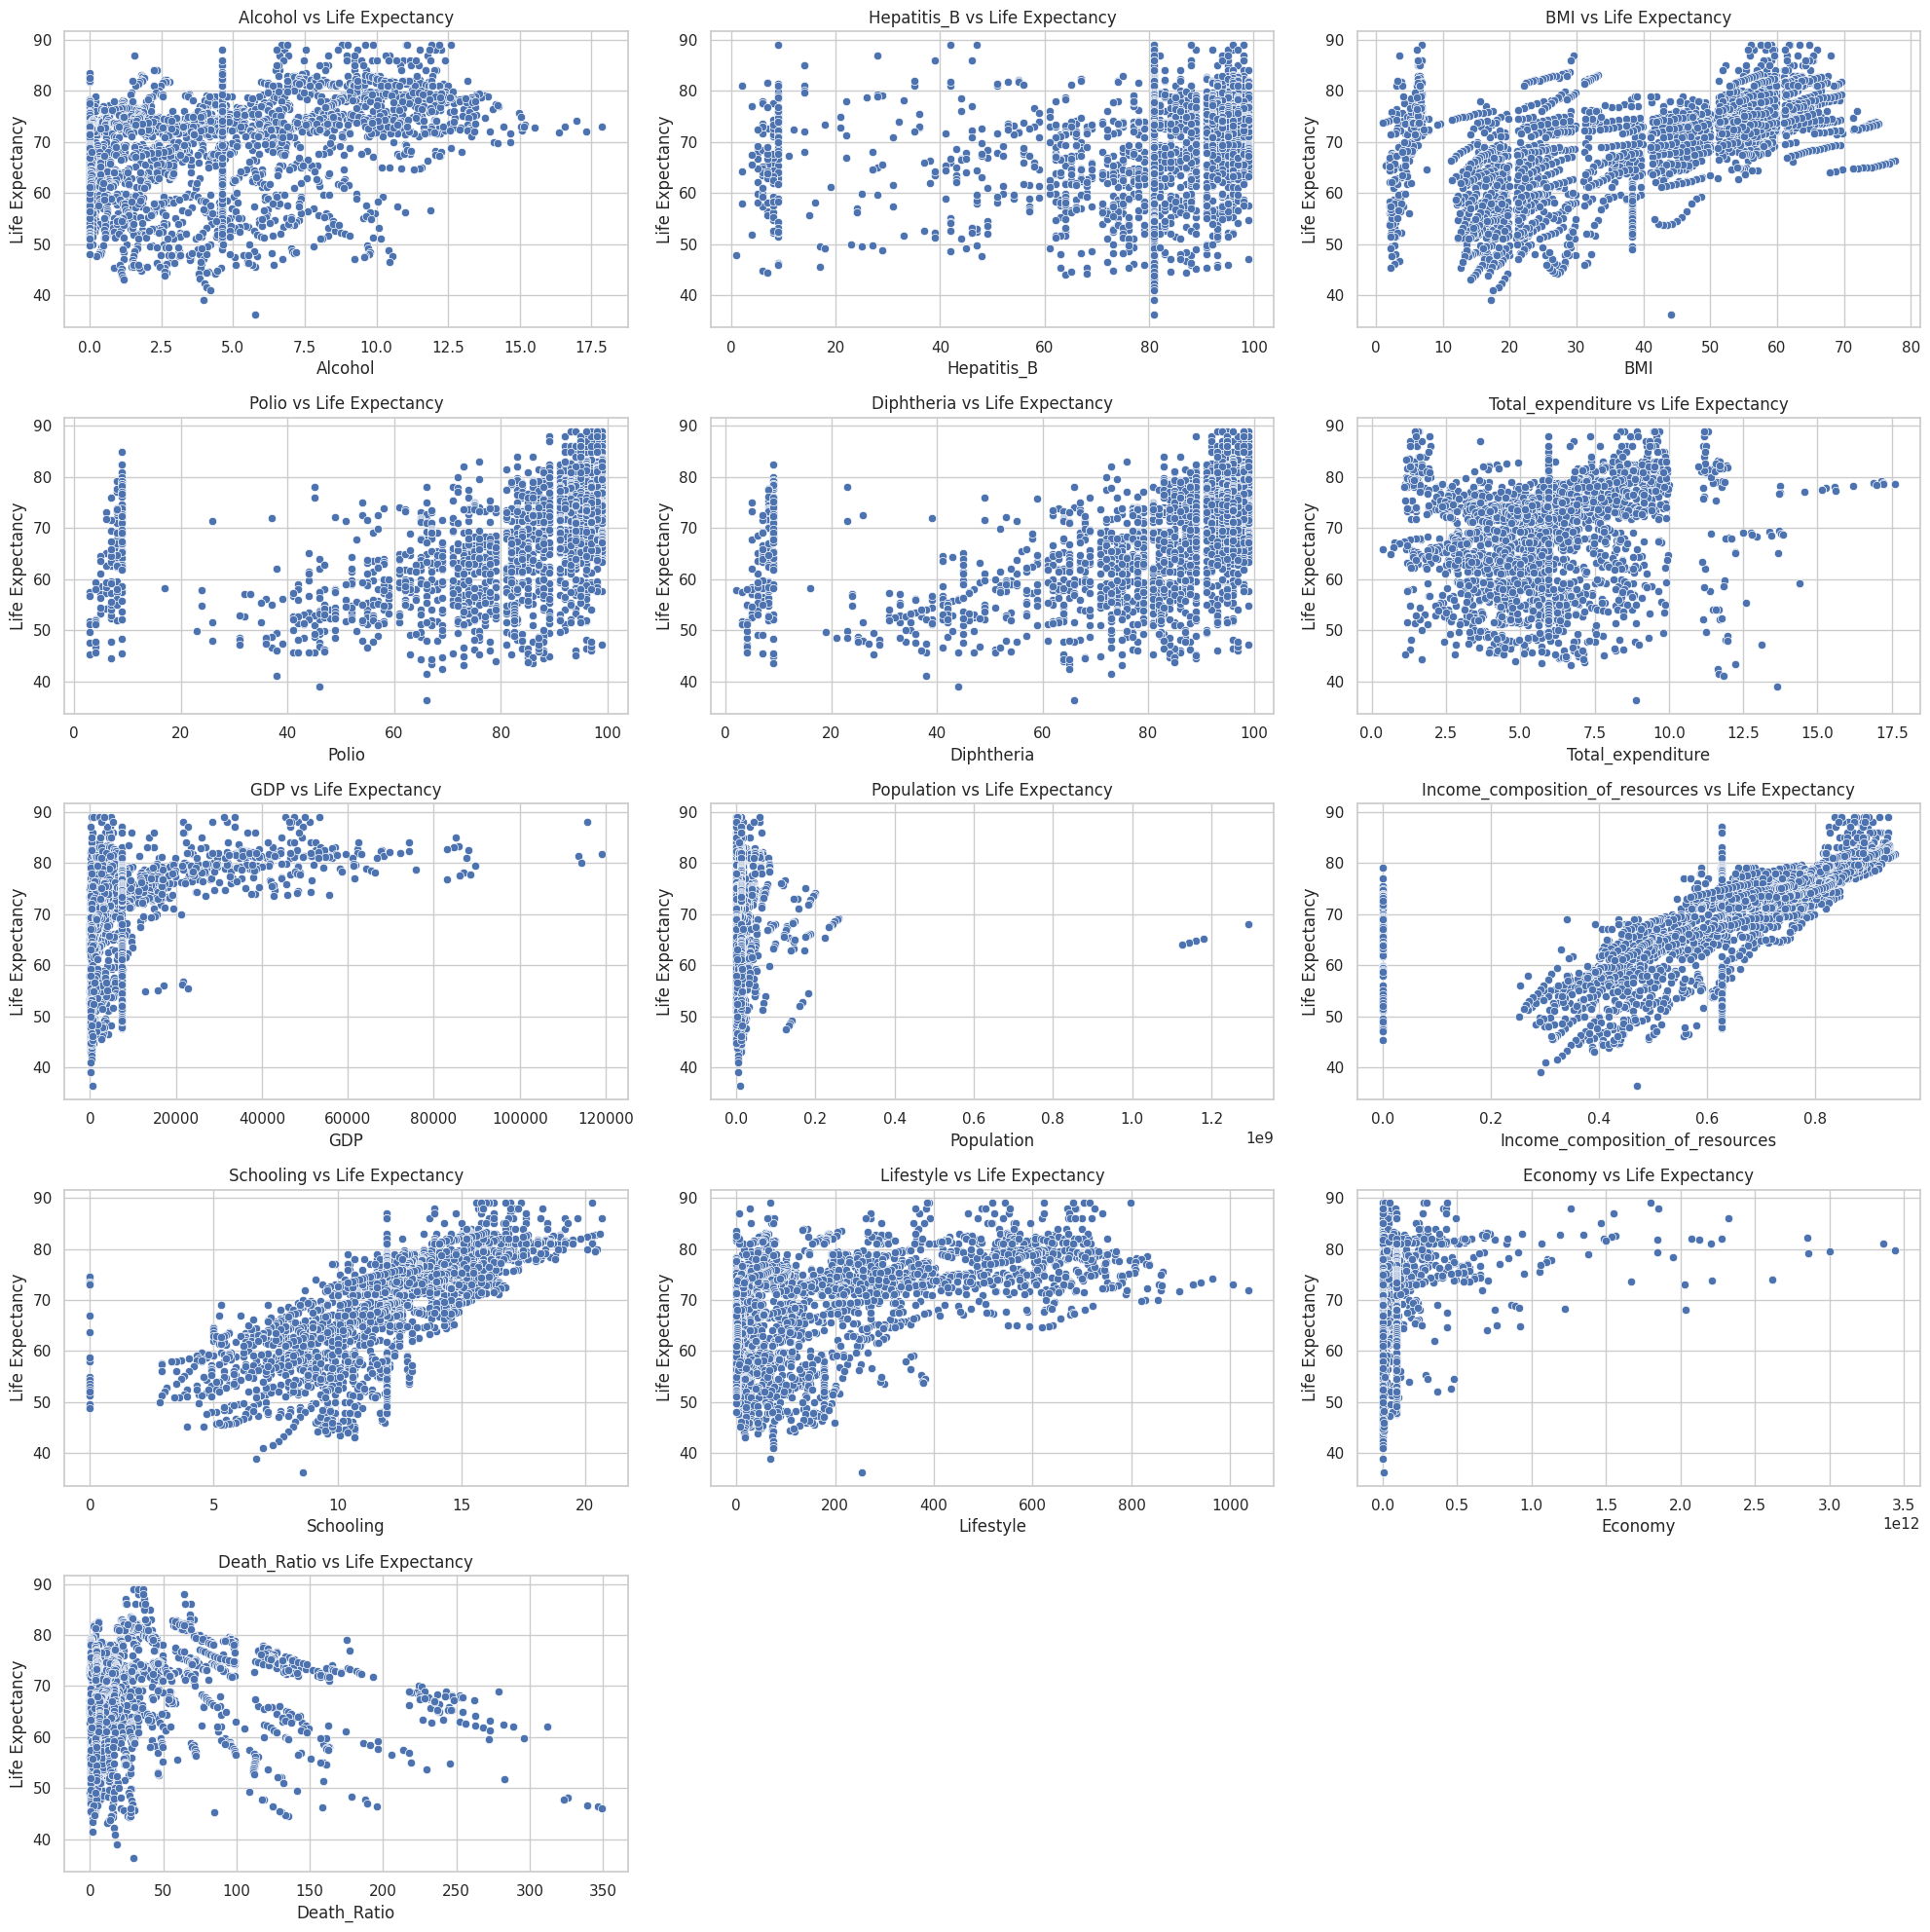

In [ ]:
# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# List of predictors to check vs Life Expectancy
predictors = ['Alcohol', 'Hepatitis_B', 'BMI', 'Polio', 'Diphtheria',
              'Total_expenditure', 'GDP', 'Population',
              'Income_composition_of_resources', 'Schooling',
              'Lifestyle', 'Economy', 'Death_Ratio']

# Create scatter plots for each predictor
for i, predictor in enumerate(predictors):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df_cleaned, x=predictor, y='Life_expectancy')
    plt.title(f'{predictor} vs Life Expectancy')
    plt.xlabel(predictor)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()


Task 3

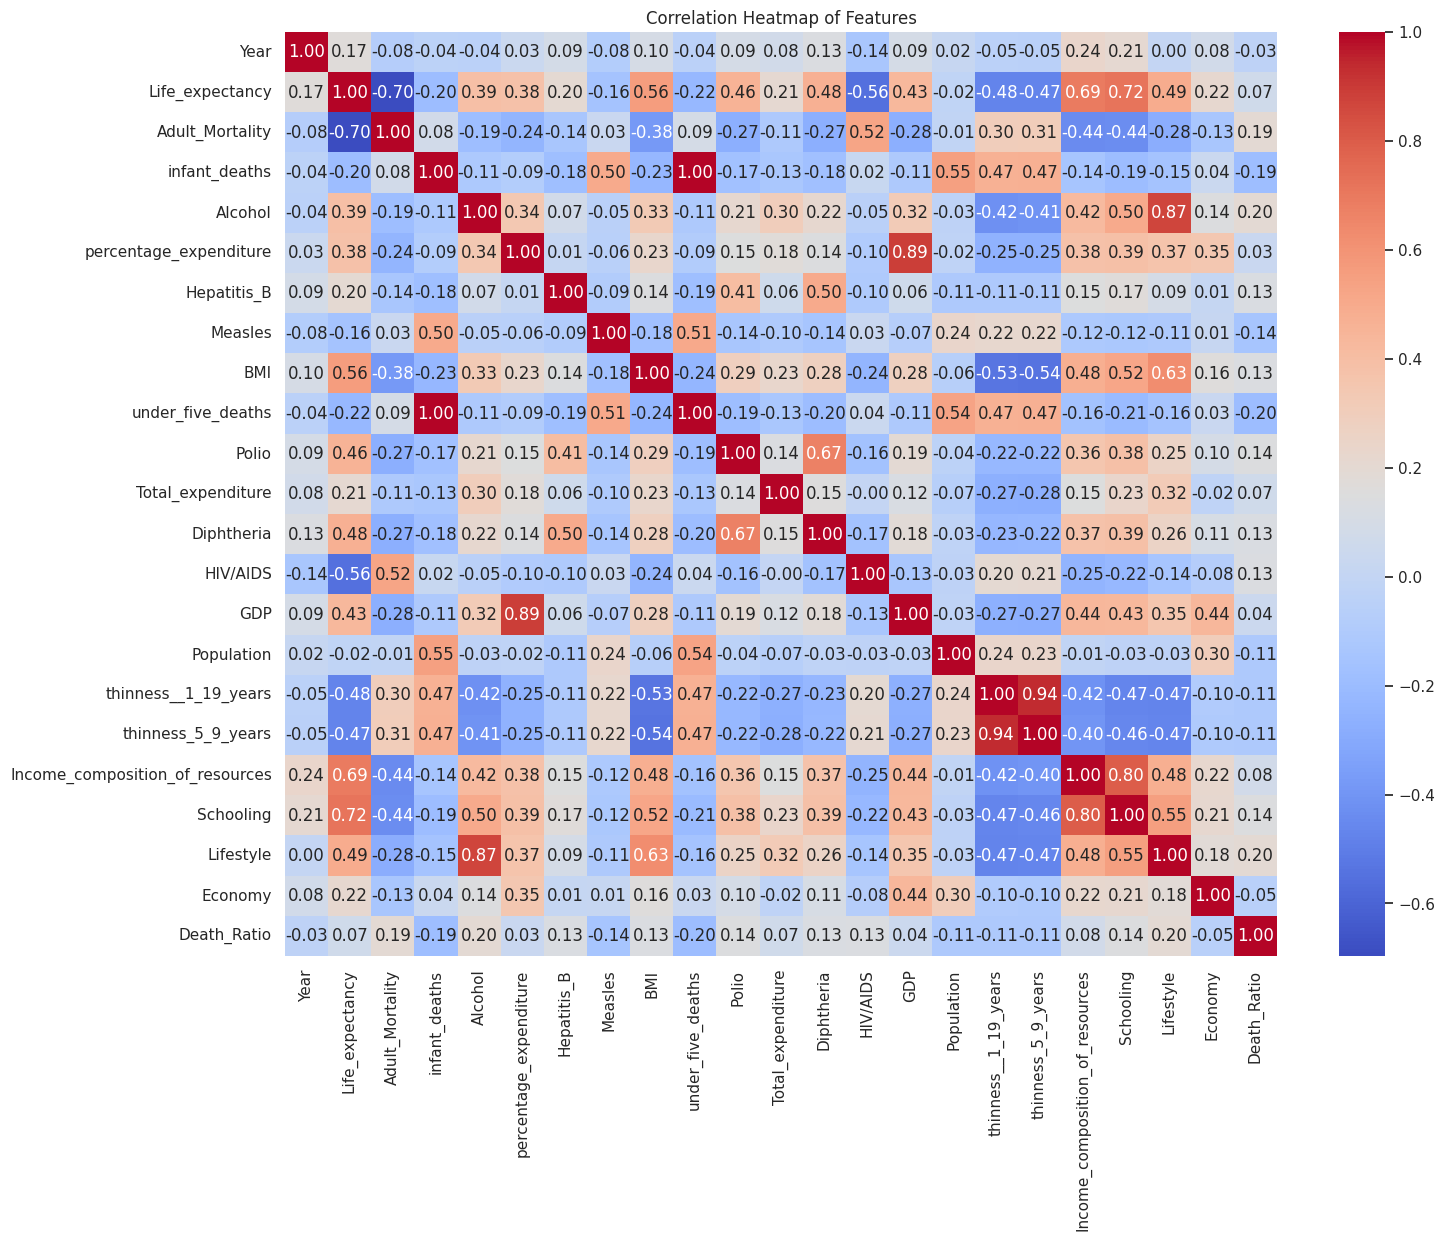

Highly correlated feature pairs (r > 0.75):
                           Feature 1           Feature 2  Correlation
68                     infant_deaths   under_five_deaths     0.996628
97                           Alcohol           Lifestyle     0.871560
108           percentage_expenditure                 GDP     0.888213
232             thinness__1_19_years  thinness_5_9_years     0.938953
243  Income_composition_of_resources           Schooling     0.800046


In [ ]:
# Compute correlation matrix (numeric-only)
corr_matrix = df_cleaned.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Show pairs with correlation > 0.75
high_corr = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.75]

print("Highly correlated feature pairs (r > 0.75):")
print(high_corr_pairs)


Task 4

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Apply to numeric features (excluding 'Year')
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Year' in numerical_features:
    numerical_features.remove('Year')

# Remove outliers
df_no_outliers = remove_outliers_iqr(df_cleaned, numerical_features)

# Show new shape
print("Shape before outlier removal:", df_cleaned.shape)
print("Shape after outlier removal:", df_no_outliers.shape)


Shape before outlier removal: (2928, 27)
Shape after outlier removal: (0, 27)


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


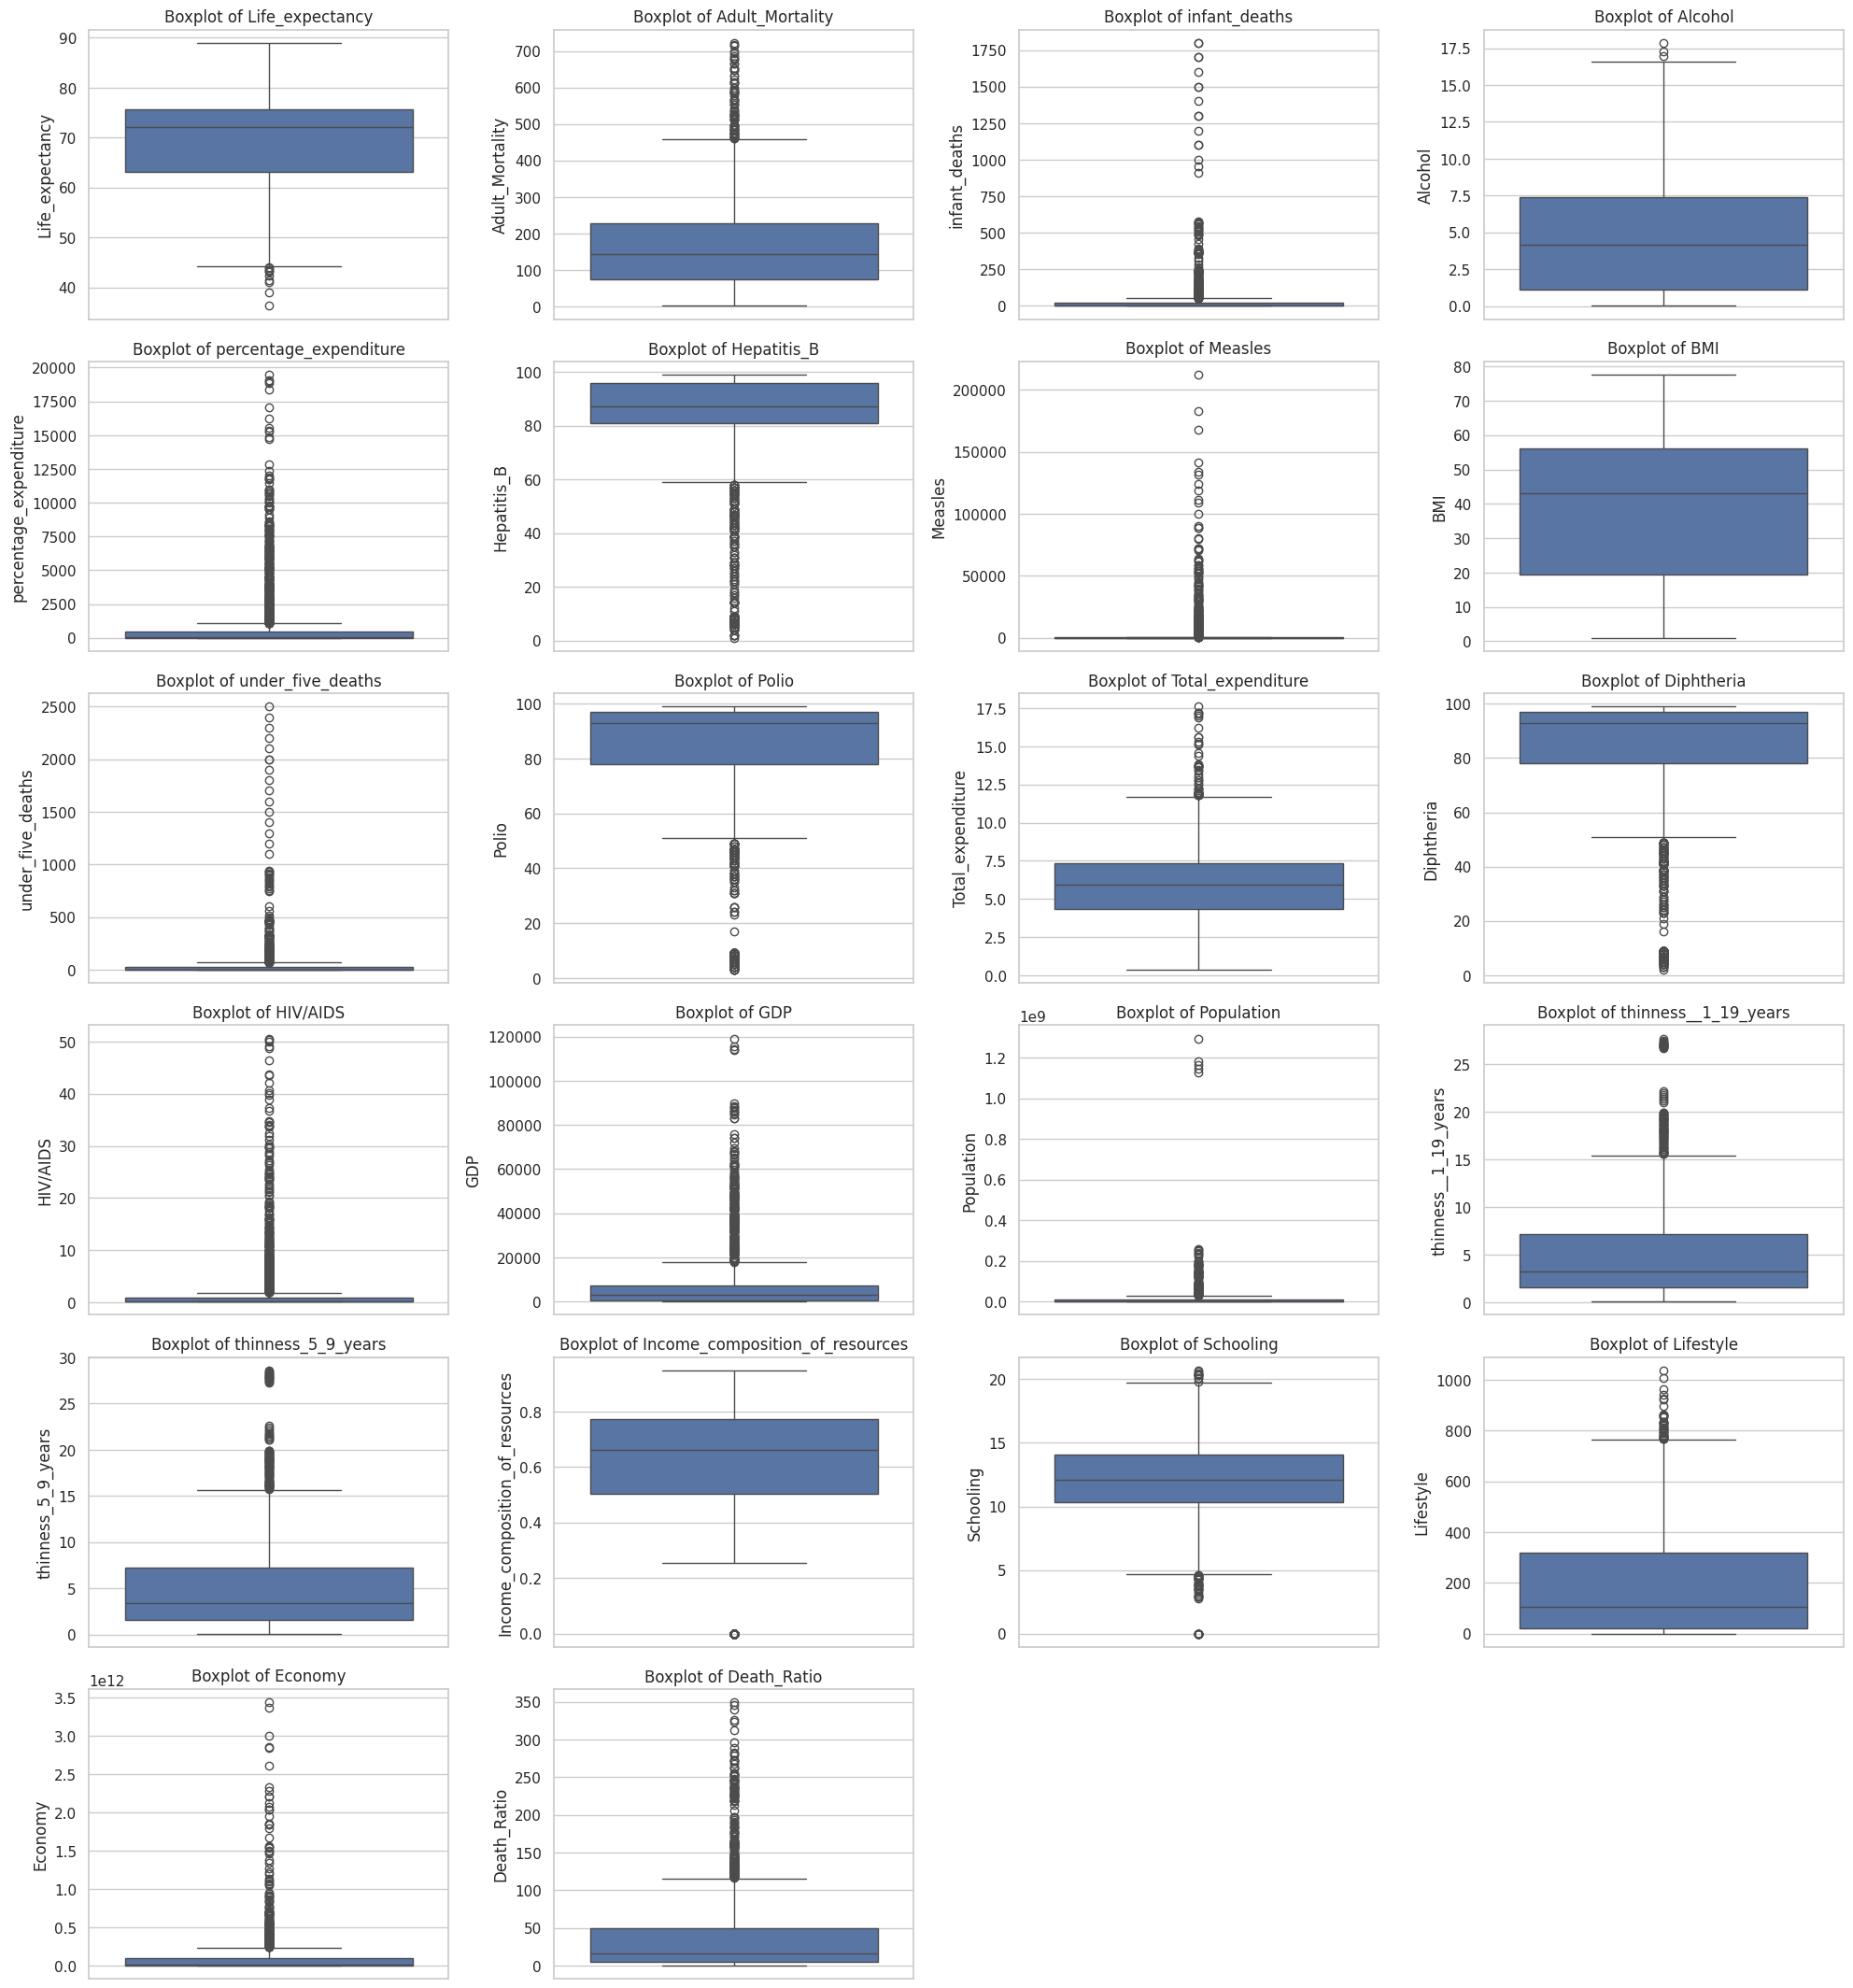

In [ ]:
# Set up plotting area
plt.figure(figsize=(20, 25))

# Loop through features to generate boxplots
for i, col in enumerate(numerical_features):
    plt.subplot(7, 4, i+1)  # Adjust rows/columns depending on # of features
    sns.boxplot(data=df_cleaned[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Task 5

*Should countries with life expectancy increase healthcare spending?*

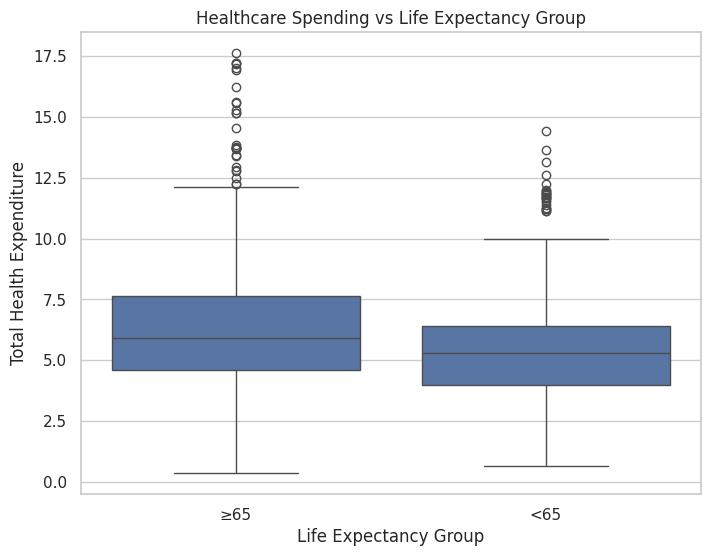

In [ ]:
#Create a new column for category
df_cleaned['Life_Group'] = df_cleaned['Life_expectancy'].apply(lambda x: '<65' if x < 65 else '≥65')

# Plot healthcare spending by life expectancy group
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cleaned, x='Life_Group', y='Total_expenditure')
plt.title("Healthcare Spending vs Life Expectancy Group")
plt.xlabel("Life Expectancy Group")
plt.ylabel("Total Health Expenditure")
plt.show()

*Impact of Schooling on Lifespan*

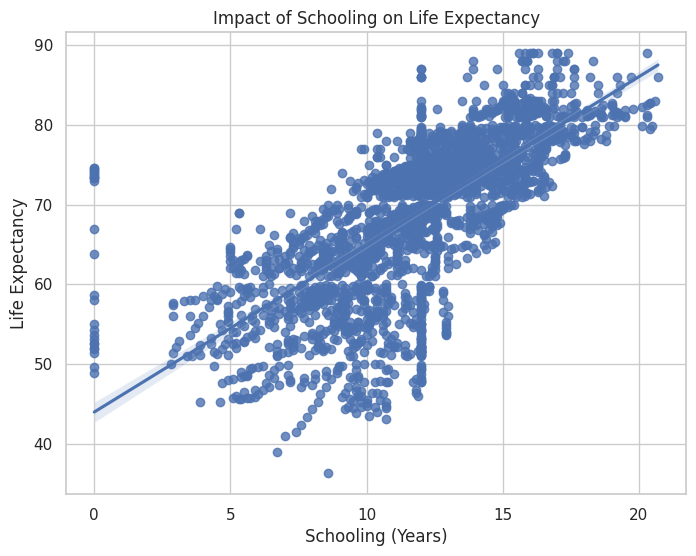

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_cleaned, x='Schooling', y='Life_expectancy')
plt.title("Impact of Schooling on Life Expectancy")
plt.xlabel("Schooling (Years)")
plt.ylabel("Life Expectancy")
plt.show()


*3. Alcohol Consumption vs Life Expectancy*

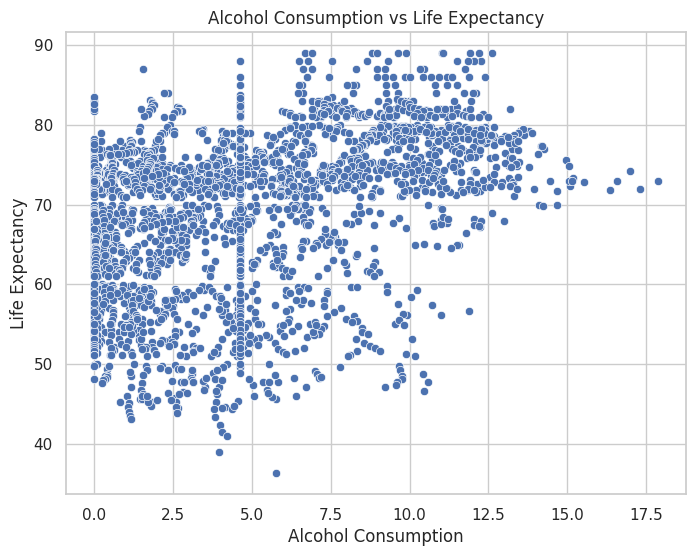

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Alcohol', y='Life_expectancy')
plt.title("Alcohol Consumption vs Life Expectancy")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy")
plt.show()


*Population Density vs Life Expectancy*

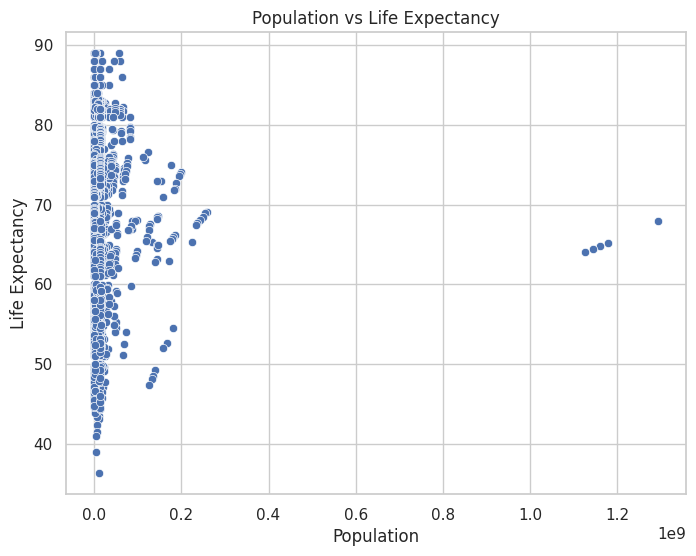

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Population', y='Life_expectancy')
plt.title("Population vs Life Expectancy")
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.show()


Task 6

In [ ]:
# 1. Drop the target column to get features
X = df_cleaned.drop(columns=['Life_expectancy'])

# 2. Drop string/categorical columns before computing the mean
X = X.select_dtypes(include=['float64', 'int64'])

# 3. Define the target variable
y = df_cleaned['Life_expectancy']

# 4. Impute missing values with column means
X = X.fillna(X.mean())

# 5. Drop any remaining NaNs just in case
X = X.dropna()
y = y.loc[X.index]  # Align target with final features



In [ ]:
# Replace Infs with NaN (again, just in case)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop columns with any remaining NaNs
X = X.dropna(axis=1)

# Drop rows with NaNs in case any remain
X = X.dropna()
y = y.loc[X.index]  # Keep y aligned with X


In [ ]:
print(df_cleaned.columns.tolist())


['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years', 'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling', 'Population_Size', 'Lifestyle', 'Economy', 'Death_Ratio', 'Life_Group']


Train RMSE: 4.03, R2: 0.83, MAPE: 4.80%
Test RMSE: 4.21, R2: 0.81, MAPE: 5.02%


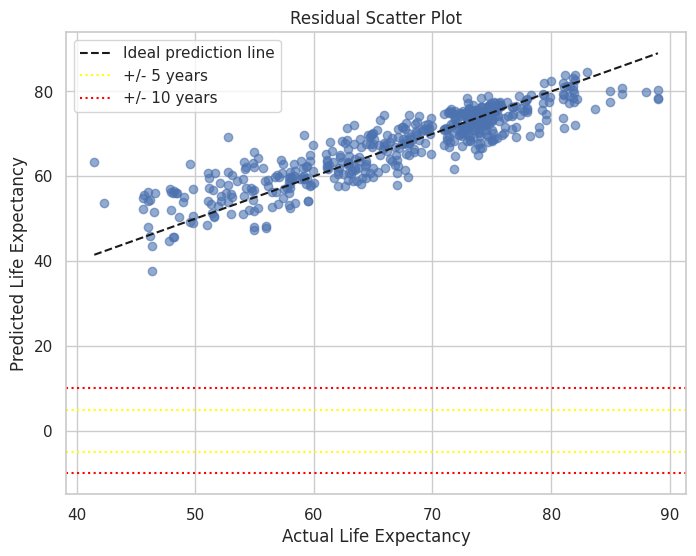

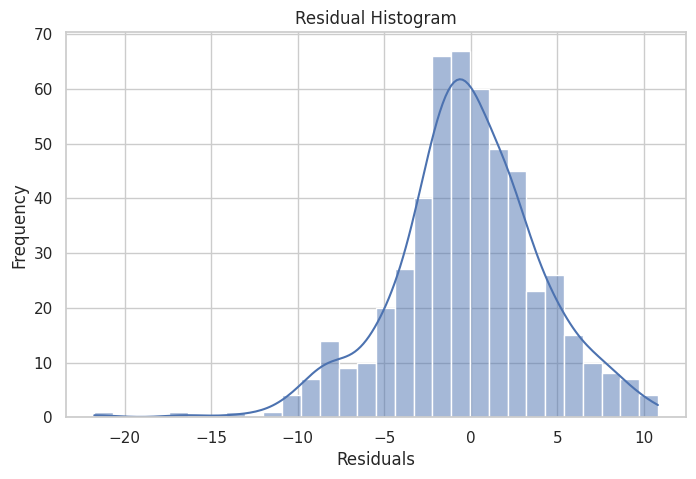

Cross-validation R2 scores: [0.83355934 0.79881926 0.78448261 0.70447435 0.74305629]
Mean CV R2: 0.77, Std Dev: 0.04


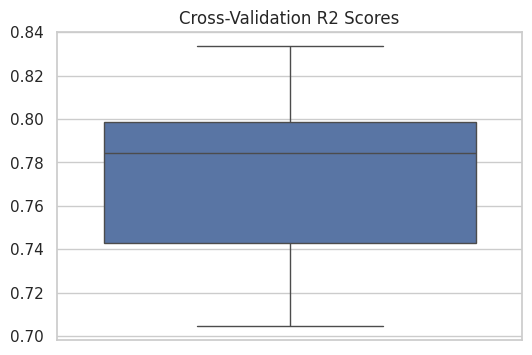

In [ ]:
# Drop columns that aren’t helpful for prediction
drop_cols = ['Country', 'Year', 'Status', 'Population_Size', 'Life_Group']
drop_cols = [col for col in drop_cols if col in df_cleaned.columns]

# Define features (X) and target (y)
X = df_cleaned.drop(columns=drop_cols + ['Life_expectancy'])  # fixed here
y = df_cleaned['Life_expectancy']  # and here

# Clean X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Match the filtered rows

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"Train RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}, MAPE: {mape_train:.2f}%")
print(f"Test RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}, MAPE: {mape_test:.2f}%")

# Residual scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal prediction line')
plt.axhline(y=5, color='yellow', linestyle='dotted', label='+/- 5 years')
plt.axhline(y=-5, color='yellow', linestyle='dotted')
plt.axhline(y=10, color='red', linestyle='dotted', label='+/- 10 years')
plt.axhline(y=-10, color='red', linestyle='dotted')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Residual Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()

# Residual histogram
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean CV R2: {cv_scores.mean():.2f}, Std Dev: {cv_scores.std():.2f}")

# Box plot of CV scores
plt.figure(figsize=(6, 4))
sns.boxplot(data=cv_scores)
plt.title("Cross-Validation R2 Scores")
plt.show()


For Task 6, I trained a linear regression model to predict life expectancy. I cleaned the data, filled in missing values, and made sure all features were numeric. After splitting into train and test sets, the model performed pretty well — R² scores were around 0.81–0.82. The residual plots looked solid too, with most predictions falling close to the actual values. Overall, I’m happy with how it turned out and the model seems to generalize well.